# Enriquecimiento de Datos Demográficos en Estados Unidos

En esta parte del proceso **ETL**, buscamos **ampliar y enriquecer** nuestro conjunto de datos para realizar un análisis más exhaustivo y con una perspectiva más amplia. Con este propósito, hemos decidido incorporar datos oficiales proporcionados por el organismo encargado de los censos demográficos en Estados Unidos, lo que nos permitirá obtener una visión más completa y precisa de la situación demográfica del país.

El organismo que regula y publica estos datos es la **Oficina del Censo de los Estados Unidos** (_U.S. Census Bureau_), responsable de recopilar, analizar y difundir datos sobre la población y la economía del país. Entre sus funciones más destacadas se encuentra la realización del censo decenal, que proporciona una imagen detallada y precisa de la composición demográfica de la nación, incluidos aspectos como la distribución por **edad**, **género**, **etnia**, y otros factores clave.

## Importancia de la Demografía de Personas de Origen Asiático

En nuestro análisis, consideramos de particular importancia la demografía de personas de **origen asiático** en los Estados Unidos. Por ello, hemos extraído y procesado conjuntos de datos directamente desde la plataforma oficial del U.S. Census Bureau, disponible en [data.census.gov](https://data.census.gov). Estos datos nos ofrecerán una base sólida para analizar la distribución y las características demográficas de la población asiática, lo cual es crucial para comprender su influencia y presencia en el país, especialmente en el contexto de nuestro estudio sobre el sector de la **comida china** en los Estados Unidos.

___

Al integrar estos **datos oficiales**, buscamos no solo ampliar nuestro conocimiento sobre la población asiática, sino también fortalecer la validez de nuestros hallazgos, asegurando que estén respaldados por **fuentes confiables** y reconocidas a nivel nacional.



## Comunidad asiática por año:

Para comenzar con este análisis demográfico compararemos el porcentaje de gente de origen asiático en "la costa este" sector de los estados unidos en el que la empresa a la que prestamos nuestro servicio "China Garden" desea invertir. 
El Objetivo de esta primera parte es obtener una tabla con el numero de habitantes de origen asiatico por año. la tabla que utilizaremos es "_B03002: "Hispanic or Latino Origin by Race."_. Esta tabla desglosa la población por origen hispano o latino y por raza en distintas categorías étnicas y raciales, lo que te permite analizar la distribución de la población según etnia.

In [40]:
import pandas as pd
import os
import numpy as np

# Ruta donde se encuentran los archivos CSV
ruta_carpeta = "C:\\Users\\fede\\Desktop\\PROYECTOFINAL\\Datasets Demografía"

# Lista de años de los archivos CSV
años = list(range(2010, 2023))

# Lista para almacenar los DataFrames
dataframes = []

# Leer y combinar todos los archivos CSV
for año in años:
    ruta_archivo = os.path.join(ruta_carpeta, f"{año}.csv")
    df = pd.read_csv(ruta_archivo)
    df['año'] = año  # Añadir la columna 'año'
    dataframes.append(df)

# Combinar todos los DataFrames en uno solo
df_filtrado = pd.concat(dataframes, ignore_index=True)

#eliminamos las series "margen de error"
df_filtrado = df_filtrado.filter(regex='^(?!.*Margin of Error)')

# Filtrar las filas de la columna "Label (Grouping)" que sean "Total:" o "Asian alone"
df_filtrado = df_filtrado[df_filtrado['Label (Grouping)'].isin(['Total:', "        Asian alone"])]
df_filtrado.reset_index(drop=True, inplace=True)


In [41]:

# Convertir las columnas numéricas a tipo numérico, ignorando la columna 'Label (Grouping)'
# Eliminar las comas de las columnas numéricas
df_numerico = df_filtrado.drop(columns=['Label (Grouping)']).replace({',': ''}, regex=True)
df_numerico = df_numerico.apply(pd.to_numeric)
df_filtrado = pd.concat([df_filtrado[['Label (Grouping)']], df_numerico], axis=1)

In [42]:
# Índices de las filas a combinar
pares_indices = [(1, 2), (4, 5), (7, 8), (10, 11), (13, 14), (16, 17), (19, 20), (22, 23), (25, 26), (28, 29), (31, 32), (34, 35), (37, 38)]

# Lista para almacenar las filas combinadas
filas_combinadas = []

# Iterar sobre los pares de índices y combinar las filas
for (i, j) in pares_indices:
    # Sumar las filas con los índices i y j
    fila_combinada = df_filtrado.loc[i] + df_filtrado.loc[j]
        
    # Añadir la fila combinada a la lista
    filas_combinadas.append(fila_combinada)
    
# Convertir la lista de filas combinadas en un DataFrame
filas_combinadas = pd.DataFrame(filas_combinadas)

# Dividir la columna 'año' por 2 y convertir a entero
filas_combinadas['año'] = (filas_combinadas['año'] / 2).astype(int)

# Añadir las filas con 'Label (Grouping)' == 'Total:' al DataFrame combinado
# Filtramos las filas con 'Label (Grouping)' == 'Total:'
filas_total = df_filtrado[df_filtrado['Label (Grouping)'] == 'Total:']

# Añadir estas filas al DataFrame combinado
df_combinado = pd.concat([filas_combinadas, filas_total])

# Ordenar el DataFrame por la columna 'año' y reasignarlo
df_combinado = df_combinado.sort_values(by=['año', 'United States!!Estimate']).reset_index(drop=True)


df_combinado.rename(columns={'Label (Grouping)': 'etnia'}, inplace=True)

df_combinado.loc[df_combinado['etnia'].str.contains('Asian', case=False, na=False), 'etnia'] = 'comunidad asiatica'


df_combinado




,etnia,United States!!Estimate,Connecticut!!Estimate,Delaware!!Estimate,Florida!!Estimate,Georgia!!Estimate,Maryland!!Estimate,Massachusetts!!Estimate,New Hampshire!!Estimate,New Jersey!!Estimate,New York!!Estimate,North Carolina!!Estimate,Rhode Island!!Estimate,South Carolina!!Estimate,Virginia!!Estimate,año
0,comunidad asiatica,14728302,134338,27482,452580,316098,319965,353211,28125,725077,1433875,211705,30939,53658,438003,2010
1,Total:,309349689,3577073,899769,18843326,9712587,5785982,6557254,1316759,8801624,19392283,9561558,1052886,4636312,8024617,2010
2,comunidad asiatica,15020419,141081,29930,463164,322841,329770,365968,29002,747620,1447760,211328,33235,63356,455242,2011
3,Total:,311591919,3580709,907135,19057542,9815210,5828289,6587536,1318194,8821155,19465197,9656401,1051302,4679230,8096604,2011
4,comunidad asiatica,15555530,147830,30632,488052,337015,339527,381262,29743,775176,1498346,227727,33814,59956,469669,2012
5,Total:,313914040,3590347,917092,19317568,9919945,5884563,6646144,1320718,8864590,19570261,9752073,1050292,4723723,8185867,2012
6,comunidad asiatica,16012120,147570,33639,509588,355900,354430,388317,31156,801879,1554980,238502,33240,65048,484497,2013
7,Total:,316128839,3596080,925749,19552860,9992167,5928814,6692824,1323459,8899339,19651127,9848060,1051511,4774839,8260405,2013
8,comunidad asiatica,16686960,151402,36172,524583,371688,369996,413079,33974,827493,1613255,246721,35676,68976,510871,2014
9,Total:,318857056,3596677,935614,19893297,10097343,5976407,6745408,1326813,8938175,19746227,9943964,1055173,4832482,8326289,2014


### Exportación del DataFrame

In [43]:
#al ser un DF pequeño, lo dejaremos en formato csv
df_combinado.to_csv('ComunidadsiaticaPorAño.csv', index=False)


# Demografía Etnias Por County Subdivision 2022

County Subdivision es un término utilizado por el U.S. Census Bureau para describir las subdivisiones geográficas dentro de un condado, que pueden incluir ciudades, pueblos, municipios, y otras unidades administrativas. Estas subdivisiones permiten un análisis más detallado de la demografía a nivel local, capturando variaciones poblacionales y características específicas dentro de los condados.

El año 2022 es el más reciente para el cual se disponen datos demográficos completos, lo que lo convierte en una fuente clave para entender las tendencias actuales en la composición étnica y racial de estas subdivisiones. Estos datos son esenciales para estudios de planificación urbana y desarrollo económico.

In [44]:
DF_Demografía_Etnias = pd.read_csv("C:\\Users\\fede\\Desktop\\PROYECTOFINAL\\Datasets Demografía\\DemografíaEtniasPorCountySubdivision2022.csv")

In [45]:
DF_Demografía_Etnias = DF_Demografía_Etnias.filter(regex='^(?!.*Margin of Error)')
# Filtrar las filas de la columna "Label (Grouping)" que sean "Total:" o "Asian alone

# Filtrar las filas de la columna "Label (Grouping)" que sean "Total:" o "Asian alone"
DF_Demografía_Etnias = DF_Demografía_Etnias[DF_Demografía_Etnias['Label (Grouping)'].isin(['Total:', "        Asian alone"])]
DF_Demografía_Etnias.reset_index(drop=True, inplace=True)

In [46]:
# Convertir las columnas numéricas a tipo numérico, ignorando la columna 'Label (Grouping)'
# Eliminar las comas de las columnas numéricas
df_numerico = DF_Demografía_Etnias.drop(columns=['Label (Grouping)']).replace({',': ''}, regex=True)
df_numerico = df_numerico.apply(pd.to_numeric)
DF_Demografía_Etnias = pd.concat([DF_Demografía_Etnias[['Label (Grouping)']], df_numerico], axis=1)

In [47]:
DF_Demografía_Etnias

,Label (Grouping),"Hartford town, Capitol Planning Region, Connecticut!!Estimate","New Britain town, Capitol Planning Region, Connecticut!!Estimate","Bridgeport town, Greater Bridgeport Planning Region, Connecticut!!Estimate","Waterbury town, Naugatuck Valley Planning Region, Connecticut!!Estimate","New Haven town, South Central Connecticut Planning Region, Connecticut!!Estimate","Danbury town, Western Connecticut Planning Region, Connecticut!!Estimate","Norwalk town, Western Connecticut Planning Region, Connecticut!!Estimate","Stamford town, Western Connecticut Planning Region, Connecticut!!Estimate","Portland city, Cumberland County, Maine!!Estimate",...,"Pawtucket city, Providence County, Rhode Island!!Estimate","Providence city, Providence County, Rhode Island!!Estimate","Bridgeport city, Connecticut!!Estimate","Danbury city, Connecticut!!Estimate","Hartford city, Connecticut!!Estimate","New Britain city, Connecticut!!Estimate","New Haven city, Connecticut!!Estimate","Norwalk city, Connecticut!!Estimate","Stamford city, Connecticut!!Estimate","Waterbury city, Connecticut!!Estimate"
0,Total:,120682,74408,148365,115009,138909,86971,91381,136197,68420,...,75057,189575,148365,86971,120682,74408,138909,91381,136197,115009
1,Asian alone,3711,1535,7198,5437,9588,2516,2398,9866,1845,...,369,13141,7198,2516,3711,1535,9588,2398,9866,5437
2,Asian alone,568,200,0,0,137,0,0,439,0,...,0,329,0,0,568,200,137,0,439,0


### Exportación del DataFrame

In [48]:
#al ser un DF pequeño, lo dejaremos en formato csv
DF_Demografía_Etnias.to_csv('Demografía2022CountySubdivision.csv', index=False)

# EDA


El Análisis Exploratorio de Datos (EDA) es un proceso que permite comprender las características principales de un conjunto de datos, identificar patrones, detectar anomalías y hacer suposiciones iniciales. Es relevante porque ayuda a preparar los datos para modelos más complejos y garantiza que cualquier análisis posterior esté basado en datos bien comprendidos y limpios.

En este proyecto, primero se realizarán análisis generales para obtener una visión amplia de los datos y sus tendencias. Posteriormente, se llevarán a cabo análisis específicos sobre los DataFrames  "Demografía Etnias Por County Subdivision 2022" y "ComunidadsiaticaPorAño", lo que permitirá identificar insights detallados y relevantes para el estudio.

Al ser Dataframes pequeños, a simple vista podemos ver que no hay nulos ni faltantes, por lo que omitiremos esos análisis

## Comunidad Asiatica Por Año 
_Analisis generales:_

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('C:\\Users\\fede\\Desktop\\ProyectoFinal\\PROYECTO\\Google-and-Yelp-Recomendaciones-PF-Henry-PT-09\\ComunidadsiaticaPorAño.csv')

Una de las primeras cosas que podríamos querer saber, es que porcentaje del total representa la comunidad asiática del total, y saber si este ha subido.

In [52]:
# Crear una copia del DataFrame para no modificar el original
df_resultado = df.copy()

# Iterar por las filas del DataFrame en pares de dos
for i in range(0, len(df_resultado), 2):
    # Calcular el porcentaje para cada columna excepto la columna 'etnia' y 'año'
    for columna in df_resultado.columns[1:-1]:  # Asumiendo que la primera columna es 'etnia' y la última es 'año'
        df_resultado.loc[i, columna] = (df_resultado.loc[i, columna] / df_resultado.loc[i + 1, columna]) * 100
    
    # La fila "Total" tiene 100% por definición, así que la dejamos igual
    df_resultado.loc[i + 1, df.columns[1:-1]] = 100

# Redondear los resultados a dos decimales
df_resultado = df_resultado.round(2)

df_resultado


#teniendo el valor como un porcentaje ya no nos interesa saber el total, ya que este siempre es el 100%
df = df_resultado[df_resultado['United States!!Estimate'] != 100]

C:\Users\fede\AppData\Local\Temp\ipykernel_6020\311172947.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.761052790326225' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_resultado.loc[i, columna] = (df_resultado.loc[i, columna] / df_resultado.loc[i + 1, columna]) * 100
C:\Users\fede\AppData\Local\Temp\ipykernel_6020\311172947.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.755528612359882' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_resultado.loc[i, columna] = (df_resultado.loc[i, columna] / df_resultado.loc[i + 1, columna]) * 100
C:\Users\fede\AppData\Local\Temp\ipykernel_6020\311172947.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 

In [53]:
df

,etnia,United States!!Estimate,Connecticut!!Estimate,Delaware!!Estimate,Florida!!Estimate,Georgia!!Estimate,Maryland!!Estimate,Massachusetts!!Estimate,New Hampshire!!Estimate,New Jersey!!Estimate,New York!!Estimate,North Carolina!!Estimate,Rhode Island!!Estimate,South Carolina!!Estimate,Virginia!!Estimate,año
0,comunidad asiatica,4.76,3.76,3.05,2.40,3.25,5.53,5.39,2.14,8.24,7.39,2.21,2.94,1.16,5.46,2010
2,comunidad asiatica,4.82,3.94,3.30,2.43,3.29,5.66,5.56,2.20,8.48,7.44,2.19,3.16,1.35,5.62,2011
4,comunidad asiatica,4.96,4.12,3.34,2.53,3.40,5.77,5.74,2.25,8.74,7.66,2.34,3.22,1.27,5.74,2012
6,comunidad asiatica,5.07,4.10,3.63,2.61,3.56,5.98,5.80,2.35,9.01,7.91,2.42,3.16,1.36,5.87,2013
8,comunidad asiatica,5.23,4.21,3.87,2.64,3.68,6.19,6.12,2.56,9.26,8.17,2.48,3.38,1.43,6.14,2014
10,comunidad asiatica,5.37,4.35,3.82,2.68,3.80,6.41,6.34,2.56,9.48,8.45,2.67,3.36,1.44,6.26,2015
12,comunidad asiatica,5.43,4.53,3.74,2.71,3.87,6.26,6.47,2.45,9.55,8.45,2.71,3.49,1.55,6.33,2016
14,comunidad asiatica,5.59,4.57,4.05,2.80,3.94,6.47,6.60,2.66,9.84,8.74,2.88,3.59,1.52,6.44,2017
16,comunidad asiatica,5.63,4.64,4.03,2.79,4.15,6.27,6.84,2.66,9.75,8.53,2.95,3.41,1.59,6.52,2018
18,comunidad asiatica,5.68,4.67,3.76,2.79,4.14,6.39,6.86,2.63,9.64,8.64,2.95,3.50,1.68,6.63,2019


## Media, mediana y moda

In [54]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Calcular la media
media = df_numerico.mean()

# Calcular la mediana
mediana = df_numerico.median()

# Calcular la moda (puede haber más de una moda, por eso se usa .iloc[0])
moda = df_numerico.mode().iloc[0]

pd.DataFrame(media)

,0
United States!!Estimate,5.373846
Connecticut!!Estimate,4.390769
Delaware!!Estimate,3.749231
Florida!!Estimate,2.683846
Georgia!!Estimate,3.843077
Maryland!!Estimate,6.190769
Massachusetts!!Estimate,6.369231
New Hampshire!!Estimate,2.493077
New Jersey!!Estimate,9.362308
New York!!Estimate,8.290000


In [55]:
pd.DataFrame(mediana)

,0
United States!!Estimate,5.43
Connecticut!!Estimate,4.53
Delaware!!Estimate,3.82
Florida!!Estimate,2.71
Georgia!!Estimate,3.87
Maryland!!Estimate,6.27
Massachusetts!!Estimate,6.47
New Hampshire!!Estimate,2.56
New Jersey!!Estimate,9.55
New York!!Estimate,8.45


In [56]:
pd.DataFrame(moda)

,0
United States!!Estimate,4.76
Connecticut!!Estimate,4.57
Delaware!!Estimate,3.05
Florida!!Estimate,2.79
Georgia!!Estimate,3.25
Maryland!!Estimate,5.53
Massachusetts!!Estimate,5.39
New Hampshire!!Estimate,2.56
New Jersey!!Estimate,8.24
New York!!Estimate,8.45


## Desviacion:

In [61]:

# Supongamos que tienes un DataFrame llamado 'df' y quieres calcular la desviación estándar de una columna específica
desviacion_estandar = df['United States!!Estimate'].std()
print(f"Desviación Estándar: {desviacion_estandar}")


Desviación Estándar: 0.3755338080994053


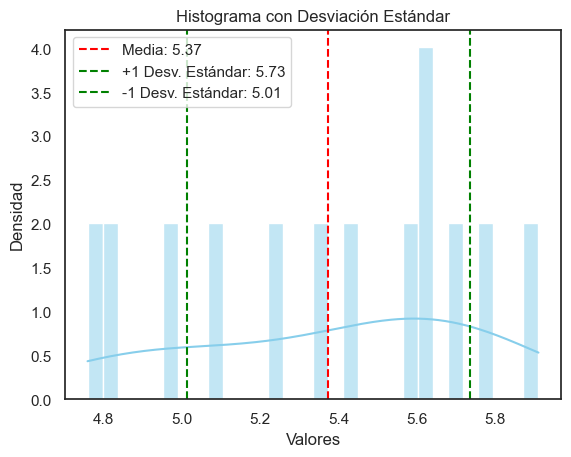

In [62]:

# Supongamos que tienes una columna llamada 'datos' en tu DataFrame
datos = df['United States!!Estimate']

# Calcular la media y la desviación estándar
media = np.mean(datos)
desviacion_estandar = np.std(datos)

# Graficar el histograma con la curva de densidad
sns.histplot(datos, kde=True, bins=30, color='skyblue', stat='density')

# Añadir líneas para la media y desviaciones estándar
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(media + desviacion_estandar, color='green', linestyle='--', label=f'+1 Desv. Estándar: {media + desviacion_estandar:.2f}')
plt.axvline(media - desviacion_estandar, color='green', linestyle='--', label=f'-1 Desv. Estándar: {media - desviacion_estandar:.2f}')

plt.title('Histograma con Desviación Estándar')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Conclusion:

De estos primeros y basicos análisis, lo mas interesante es la desviación estándar. Es una medida clave en estadística que nos indica cuánto se dispersan o varían los datos con respecto a la media. En este caso, la desviación estándar de 0.3755338080994053 ofrece una perspectiva sobre la dispersión de tus datos. Es un valor relativamente bajo, indicando que los datos están bastante concentrados alrededor de la media. En otras palabras, la mayoría de los valores en tu conjunto de datos están cercanos a la media, con una variación limitada.



## Análisis especificos:

C:\Users\fede\AppData\Local\Temp\ipykernel_6020\3236294283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['año'] = pd.to_numeric(df['año'], errors='coerce')


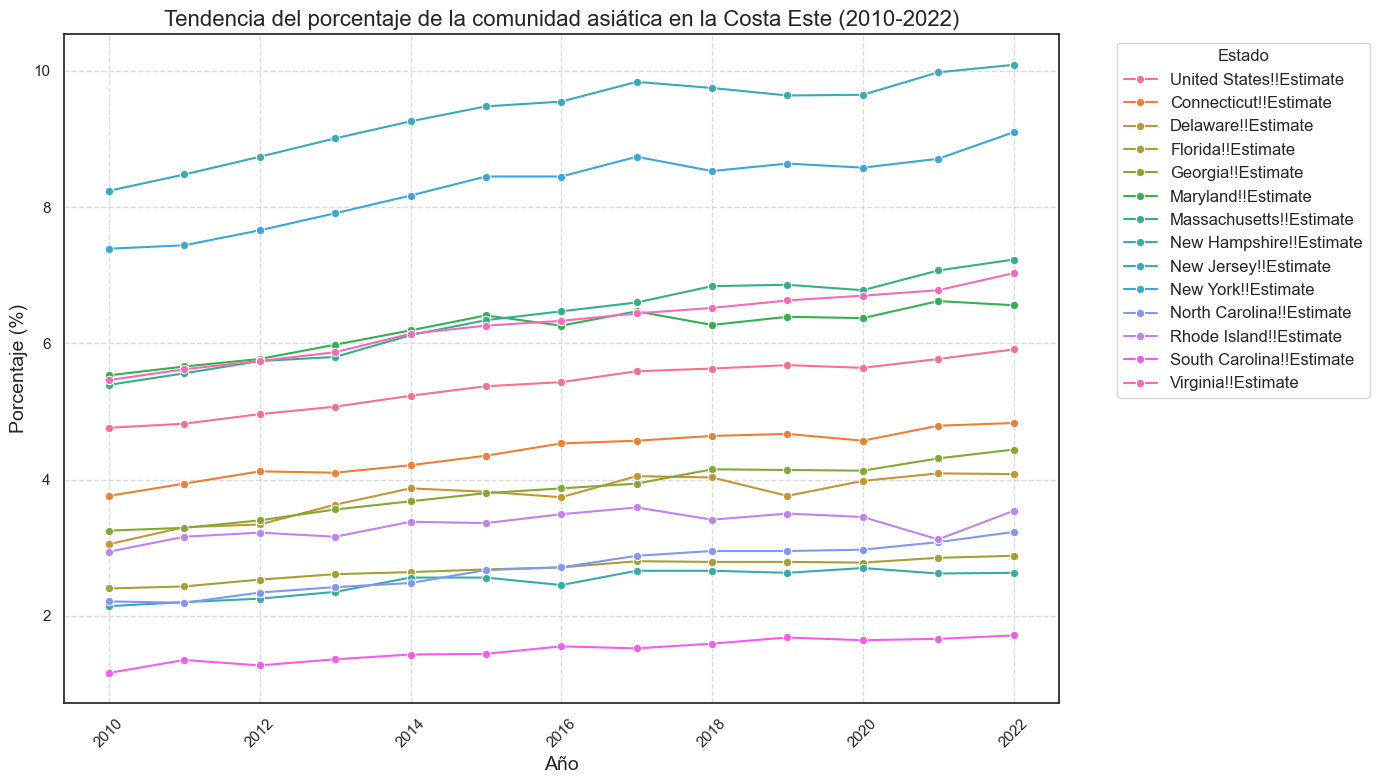

In [57]:

df['año'] = pd.to_numeric(df['año'], errors='coerce')

# Convertir el DataFrame a un formato largo
df_long = df.melt(id_vars=['año'], var_name='Estado', value_name='Porcentaje')

# Convertir la columna 'Porcentaje' a números y manejar posibles valores NaN
df_long['Porcentaje'] = pd.to_numeric(df_long['Porcentaje'], errors='coerce')
df_long = df_long.dropna(subset=['Porcentaje'])  # Eliminar filas donde 'Porcentaje' es NaN

# Aplicar un estilo de seaborn
sns.set(style='white')
# Configurar el gráfico
plt.figure(figsize=(14, 8))

# Crear el gráfico de líneas con seaborn
sns.lineplot(data=df_long, x='año', y='Porcentaje', hue='Estado', marker='o')

# Mejorar la presentación del gráfico
plt.title('Tendencia del porcentaje de la comunidad asiática en la Costa Este (2010-2022)', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar el diseño para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [58]:
df

,etnia,United States!!Estimate,Connecticut!!Estimate,Delaware!!Estimate,Florida!!Estimate,Georgia!!Estimate,Maryland!!Estimate,Massachusetts!!Estimate,New Hampshire!!Estimate,New Jersey!!Estimate,New York!!Estimate,North Carolina!!Estimate,Rhode Island!!Estimate,South Carolina!!Estimate,Virginia!!Estimate,año
0,comunidad asiatica,4.76,3.76,3.05,2.40,3.25,5.53,5.39,2.14,8.24,7.39,2.21,2.94,1.16,5.46,2010
2,comunidad asiatica,4.82,3.94,3.30,2.43,3.29,5.66,5.56,2.20,8.48,7.44,2.19,3.16,1.35,5.62,2011
4,comunidad asiatica,4.96,4.12,3.34,2.53,3.40,5.77,5.74,2.25,8.74,7.66,2.34,3.22,1.27,5.74,2012
6,comunidad asiatica,5.07,4.10,3.63,2.61,3.56,5.98,5.80,2.35,9.01,7.91,2.42,3.16,1.36,5.87,2013
8,comunidad asiatica,5.23,4.21,3.87,2.64,3.68,6.19,6.12,2.56,9.26,8.17,2.48,3.38,1.43,6.14,2014
10,comunidad asiatica,5.37,4.35,3.82,2.68,3.80,6.41,6.34,2.56,9.48,8.45,2.67,3.36,1.44,6.26,2015
12,comunidad asiatica,5.43,4.53,3.74,2.71,3.87,6.26,6.47,2.45,9.55,8.45,2.71,3.49,1.55,6.33,2016
14,comunidad asiatica,5.59,4.57,4.05,2.80,3.94,6.47,6.60,2.66,9.84,8.74,2.88,3.59,1.52,6.44,2017
16,comunidad asiatica,5.63,4.64,4.03,2.79,4.15,6.27,6.84,2.66,9.75,8.53,2.95,3.41,1.59,6.52,2018
18,comunidad asiatica,5.68,4.67,3.76,2.79,4.14,6.39,6.86,2.63,9.64,8.64,2.95,3.50,1.68,6.63,2019


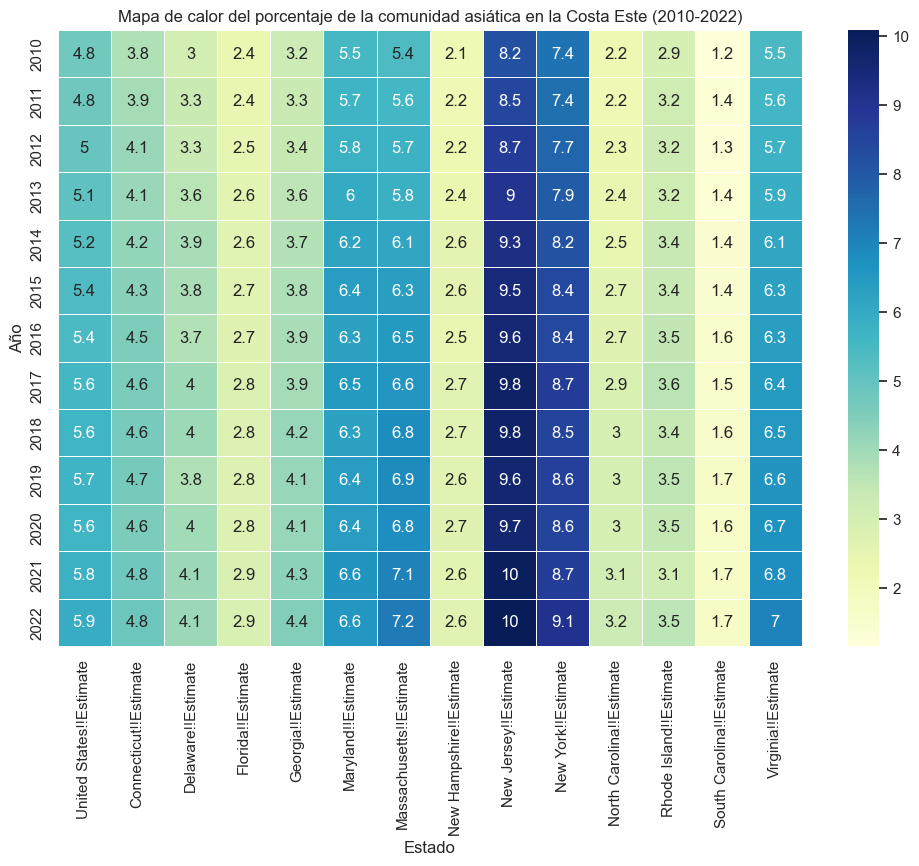

In [59]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.set_index('año').iloc[:, 1:], annot=True, cmap='YlGnBu', linewidths=.5)

plt.title('Mapa de calor del porcentaje de la comunidad asiática en la Costa Este (2010-2022)')
plt.xlabel('Estado')
plt.ylabel('Año')
plt.show()



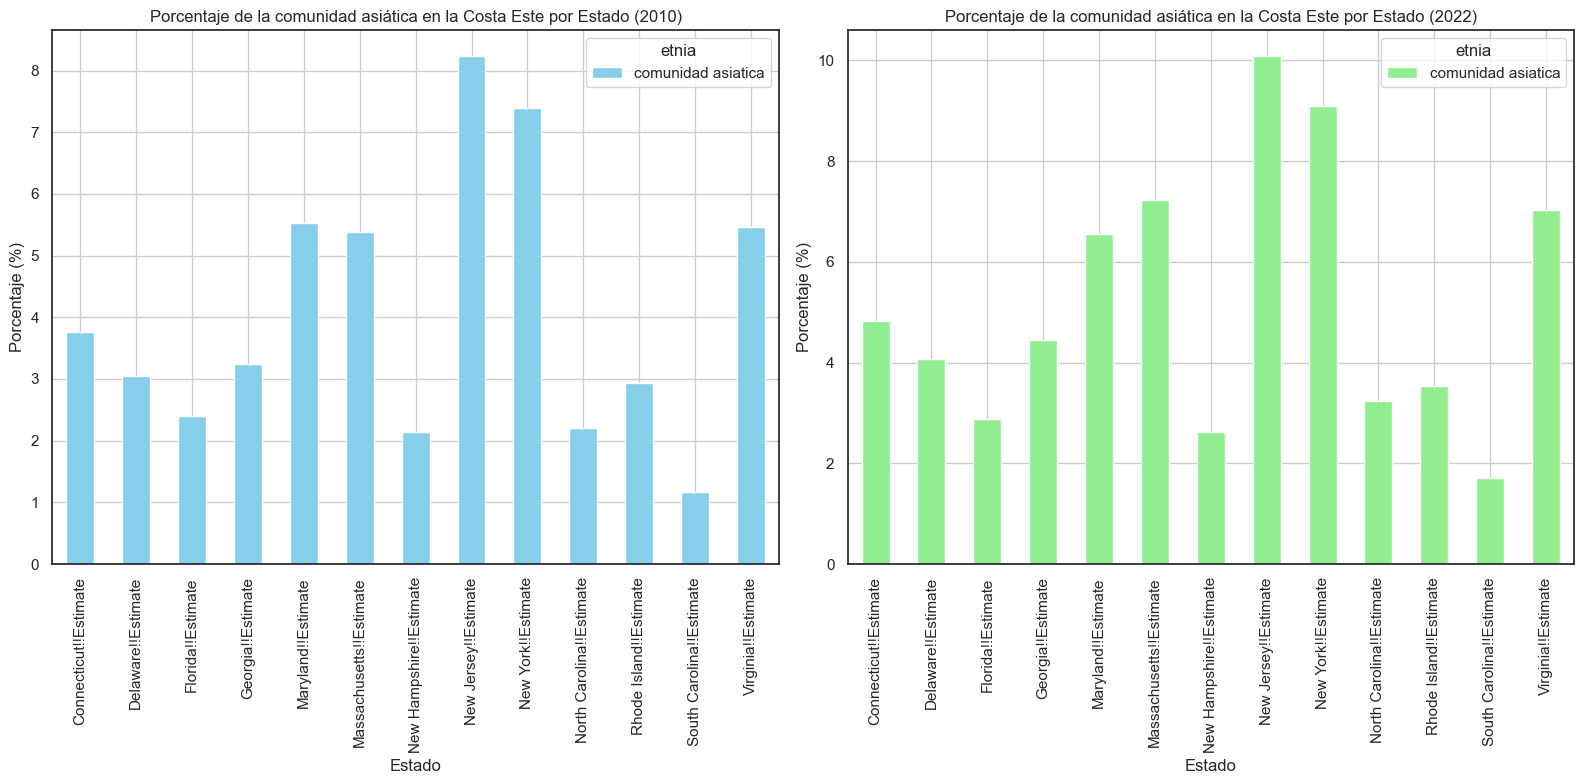

In [60]:

# Crear el DataFrame para 2010
df_2010 = df[df['año'] == 2010].set_index('etnia').iloc[:, 1:]
df_2010 = df_2010.drop(columns=['año'])

# Crear el DataFrame para 2022
df_2022 = df[df['año'] == 2022].set_index('etnia').iloc[:, 1:]
df_2022 = df_2022.drop(columns=['año'])

# Crear la figura y los ejes
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico para el año 2010
df_2010.T.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Porcentaje de la comunidad asiática en la Costa Este por Estado (2010)')
axes[0].set_xlabel('Estado')
axes[0].set_ylabel('Porcentaje (%)')
axes[0].grid(True)

# Gráfico para el año 2022
df_2022.T.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Porcentaje de la comunidad asiática en la Costa Este por Estado (2022)')
axes[1].set_xlabel('Estado')
axes[1].set_ylabel('Porcentaje (%)')
axes[1].grid(True)

# Ajustar los espacios entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()
